In [1]:
import numpy as np
import cv2 as cv
import os
import matplotlib.pyplot as plt
from skimage.measure import find_contours
from scipy.spatial import distance as dist

plt.rcParams['figure.figsize'] = (10.0, 10.0)

In [103]:
def preprocess_fibrotic_img(image):
    only_fibr = np.copy(image)
    only_fibr[only_fibr!=2] = 0
    only_fibr[only_fibr==2] = 255

    imgray = cv.cvtColor(only_fibr, cv.COLOR_BGR2GRAY)
    imgray = cv.GaussianBlur(imgray,(5,5),0)
    kernel = cv.getStructuringElement(cv.MORPH_RECT,(5,5))
    imgray = cv.dilate(imgray,kernel)
    (_, binary) = cv.threshold(imgray, 1, 255, cv.THRESH_BINARY)    
    return only_fibr, binary

def filter_contours_by_aspect_ratio(contours, threshold):

    def find_difference_aspect_ratio(cnt1, cnt2):
        x,y,w,h = cv.boundingRect(cnt1)
        aspect_ratio1 = float(w)/h
        x,y,w,h = cv.boundingRect(cnt2)
        aspect_ratio2 = float(w)/h
        return abs(aspect_ratio1 - aspect_ratio2)
        filtered_contours = []
        index_filtered_contours = 0
        wether_add_new_contour = True
    
    filtered_contours = []
    wether_add_new_contour = True
    
    for i in range(len(contours)):
        if cv.contourArea(contours[i])<1500:
            continue
        if len(filtered_contours) == 0:
            filtered_contours.append(contours[i])
            continue

        for filtered_contour in filtered_contours:
            if find_difference_aspect_ratio(contours[i], filtered_contour) < threshold:
                wether_add_new_contour = False
                break
        if wether_add_new_contour:
            filtered_contours.append(contours[i])
        wether_add_new_contour = True
        
    return filtered_contours

def filter_contours_by_area(contours, threshold):
    
    def find_difference_area(cnt1, cnt2):
        return abs(cv.contourArea(cnt1) - cv.contourArea(cnt2))

    filtered_contours = []
    index_filtered_contours = 0
    wether_add_new_contour = True


    for i in range(len(contours)):
        if cv.contourArea(contours[i])<1500:
            continue
        if len(filtered_contours) == 0:
            filtered_contours.append(contours[i])
            continue

        for filtered_contour in filtered_contours:
            if find_difference_area(contours[i], filtered_contour) < threshold:
                wether_add_new_contour = False
                break
        if wether_add_new_contour:
            filtered_contours.append(contours[i])
        wether_add_new_contour = True
    return filtered_contours

In [121]:
PATH_TO_CONTOURS = '/home/bohdan/histologie/data/doctor_annotations/y_raw_contours/'
img_names = os.listdir(PATH_TO_CONTOURS)
imgs = [preprocess_fibrotic_img(cv.imread(os.path.join(PATH_TO_CONTOURS, img_names[i]))) for i in range(len(img_names))]

In [119]:
img_names
for i in range(len(img_names)):
    print(i, ' ', img_names[i], '\n')

0   3315_15_2054.png 

1   3315_15_2060.png 

2   3315_15_2056.png 

3   3315_15_2062.png 

4   3315_15_2066.png 

5   3315_15_2072.png 

6   3315_15_2068.png 

7   3315_15_2074.png 

8   9447_14_1763.png 

9   9447_14_4535.png 

10   9447_14_1765.png 

11   9447_14_4537.png 

12   9447_14_4531.png 

13   10772_15_432.png 

14   10772_15_3134.png 

15   10772_15_436.png 

16   10772_15_3126.png 

17   10772_15_3128.png 

18   10772_15_3132.png 

19   10251_14_226.png 

20   10251_14_228.png 

21   10251_14_230.png 

22   10251_14_232.png 

23   10251_14_2917.png 

24   10251_14_2919.png 

25   10251_14_236.png 

26   10251_14_238.png 

27   10251_14_2909.png 

28   10251_14_2911.png 

29   10251_14_2913.png 

30   516_15_1546.png 

31   516_15_4334.png 

32   516_15_1548.png 

33   516_15_4336.png 

34   516_15_1552.png 

35   516_15_4328.png 

36   516_15_1554.png 

37   516_15_4330.png 

38   10764_15_352.png 

39   10764_15_3038.png 

40   10764_15_356.png 

41   10764_15_3042.png 


In [123]:
flood_filled_imgs = []
for only_fibr_img, binary in imgs:
    (_, contours, hierarchy) = cv.findContours(binary, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
    pass

In [182]:
contours[0][0][0][1]

411

1
2
3
4
5
6
7


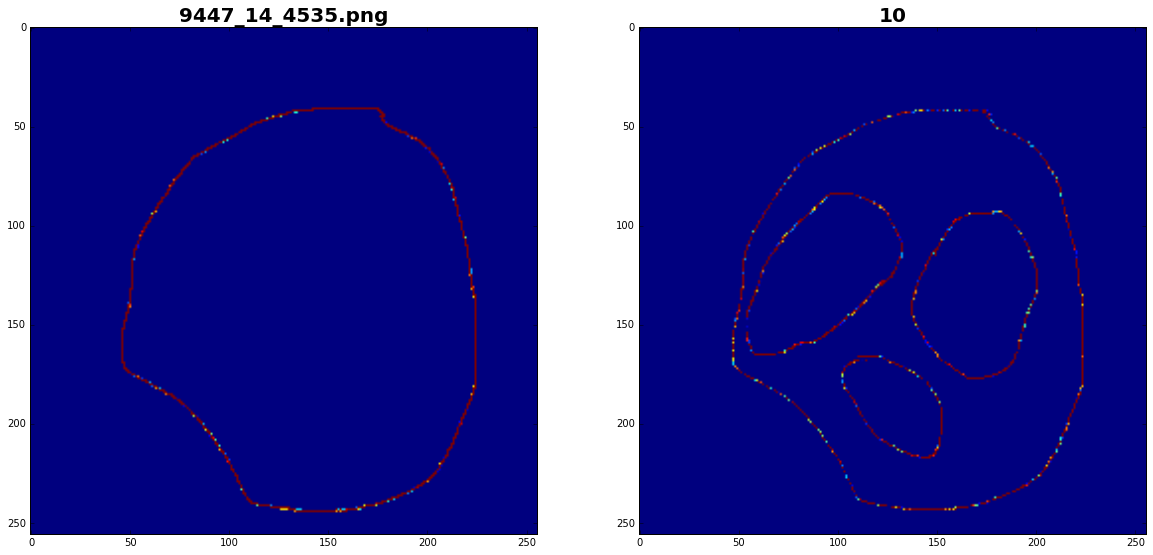

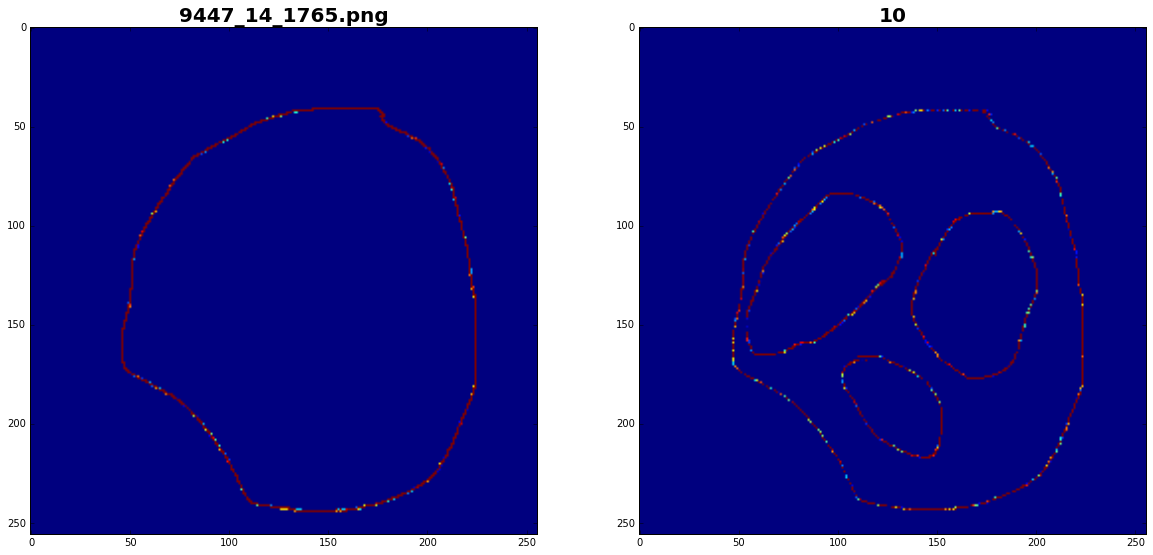

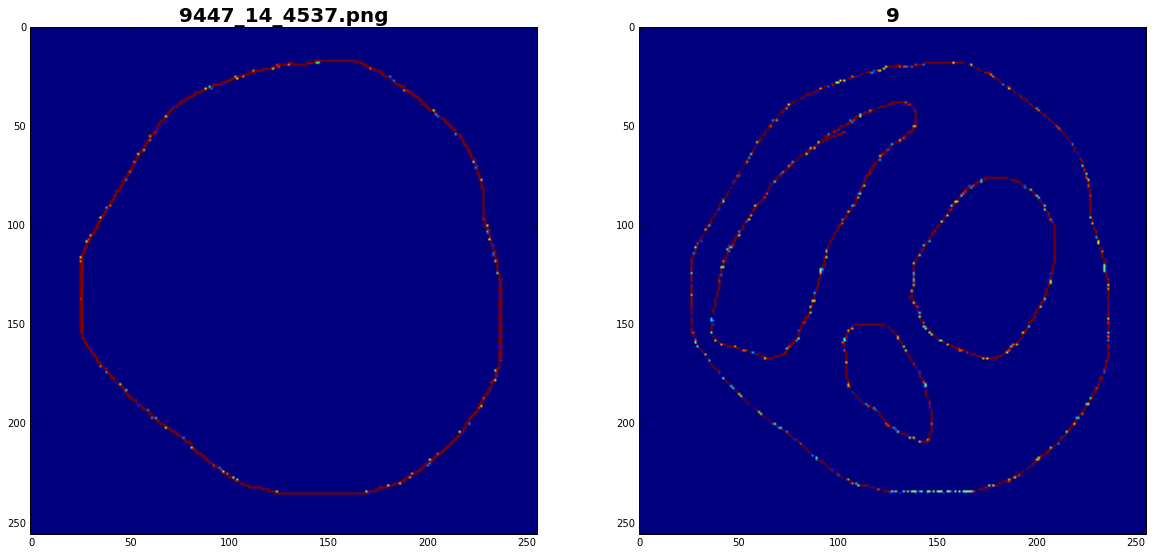

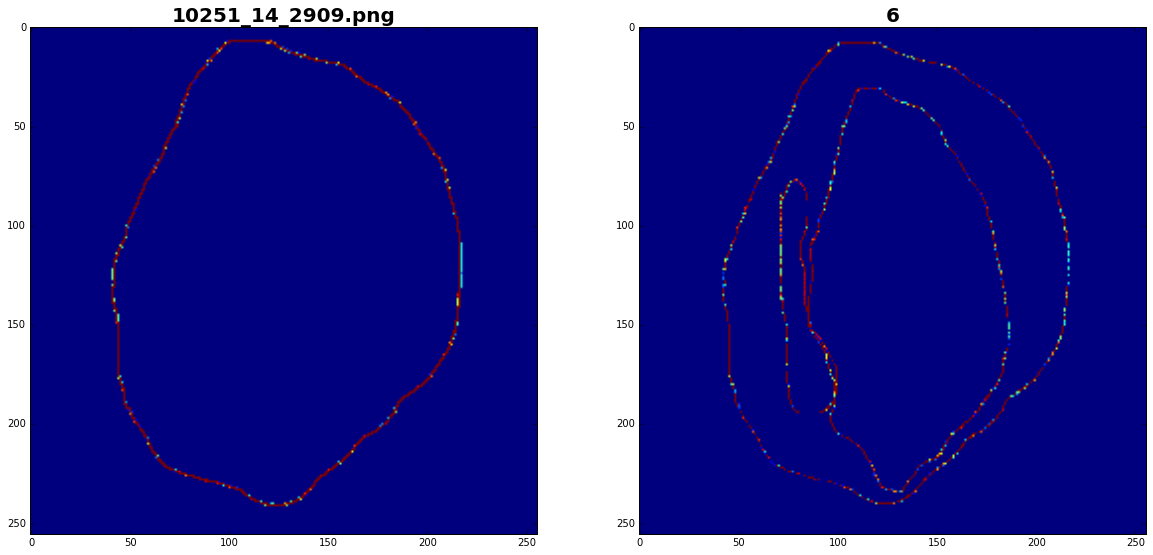

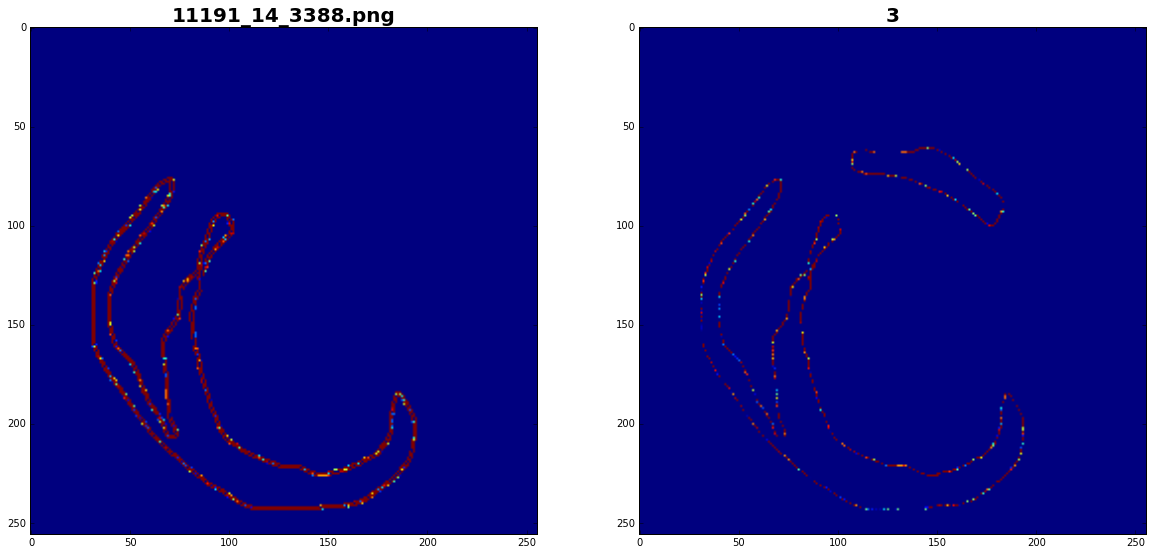

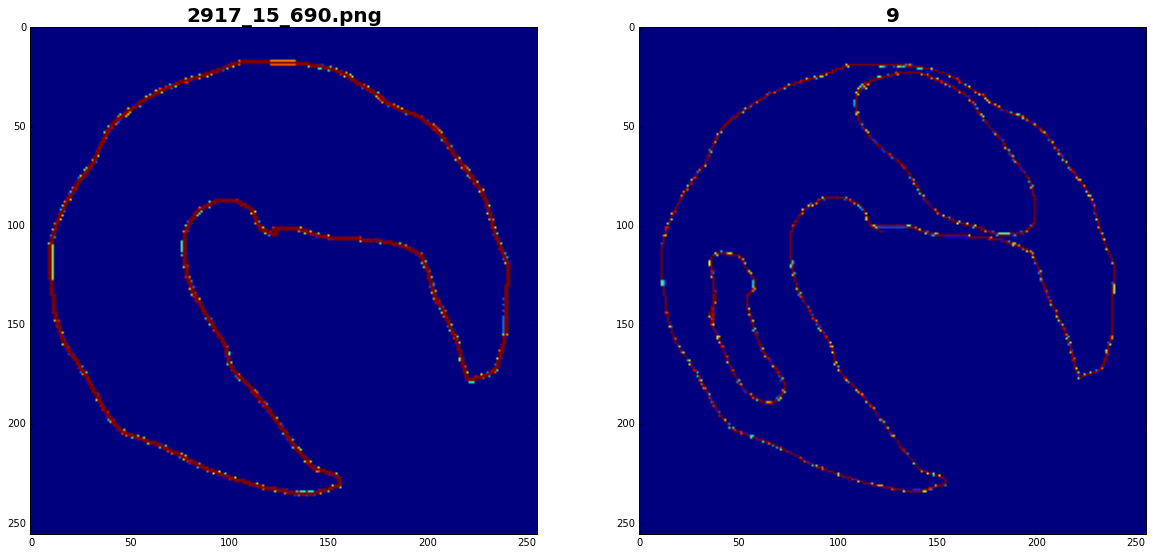

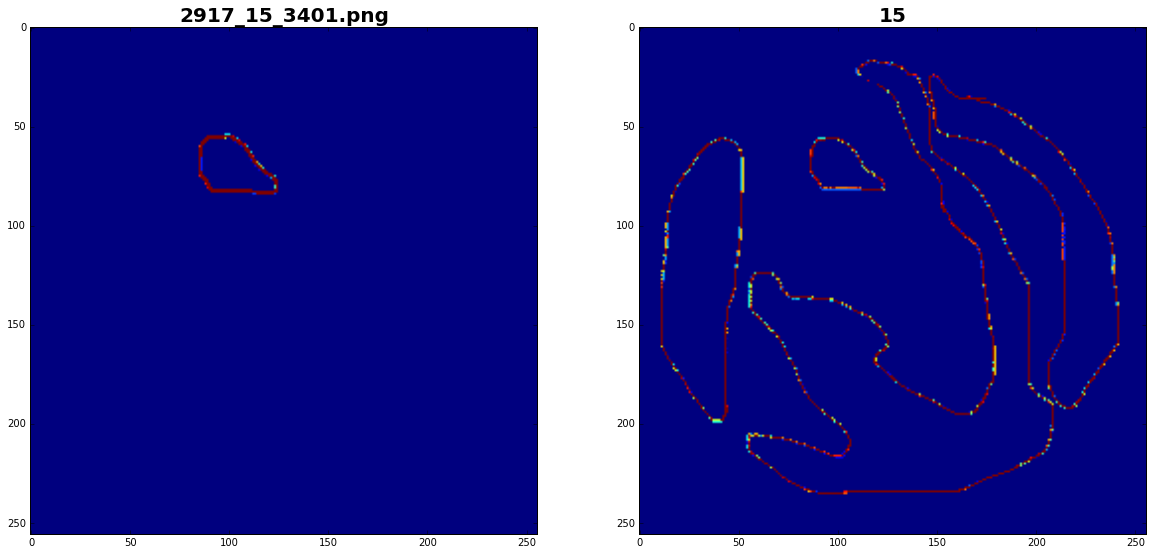

In [200]:
failed_imgs_aspect_ratio = ['516_15_4330.png', '11191_14_678.png', '11191_14_3386.png', \
               '2917_15_3409.png', '2917_15_692.png', \
              '516_15_4334.png',
              '10764_15_3042.png', '10764_15_356.png', #вкладені у середину: 
              '2917_15_3403.png' #окремі + вкладений: 
              ]

succeded_imgs_aspect_ratio = ['2917_15_3407.png', '10772_15_436.png','10772_15_3126.png',\
                 '10764_15_352.png']
succeded_imgs_area = ['3315_15_2060.png','3315_15_2056.png','10251_14_2917.png', '3315_15_2062.png',
                     '3315_15_2074.png','3315_15_2072.png', '9447_14_4531.png','10251_14_238.png',
                     '10251_14_2911.png','10251_14_2913.png', '11191_14_680.png']
# succeded_area = 
# '9447_14_4535.png',
# '10251_14_236.png','516_15_1548.png','516_15_1552.png','516_15_4328.png','516_15_1554.png',
i=0
kik=0

threshold_32_imgs = 0.0155
threshold_for_area = 125098
threshold_for_area1 = 0.00855

for only_fibr_img, binary in imgs:

    (_, contours, hierarchy) = cv.findContours(binary, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

    filtered_contours = filter_contours_by_aspect_ratio(contours, threshold_32_imgs)
    
    if img_names[i] in failed_imgs_aspect_ratio:
#         i+=1
        i+=1
        continue
    elif len(filtered_contours) <= 2 or img_names[i] in succeded_imgs_aspect_ratio:
        ff = np.zeros((binary.shape), 'uint8')
        cv.fillPoly(ff, filtered_contours, 255)
        i+=1
    elif img_names[i] in succeded_imgs_area:
        filtered_contours = filter_contours_by_area(contours, threshold_for_area)
        ff = np.zeros((img.shape), 'uint8')
        cv.fillPoly(ff, filtered_contours, 255)
        i+=1
    else:
        filtered_contours = contours#filter_contours_by_aspect_ratio(contours, threshold_for_area1)
        ff = np.zeros((binary.shape), 'uint8')
        ff_mask = np.zeros((binary.shape[0]+2,binary.shape[1]+2), 'uint8')
        cv.drawContours(ff, filtered_contours, 0, 255, 10)
#         cv.floodFill(ff, ff_mask, (), 1)
        cv.fillPoly(ff, filtered_contours[0], 255)        
        plt.figure(figsize=(20,10))
        plt.subplot(1,2,1)
        plt.title(img_names[i], fontweight='bold', fontsize=20)
        plt.imshow(cv.resize(ff, dsize=(256, 256)))
        plt.subplot(1,2,2)
        plt.title(str(len(contours)), fontweight='bold', fontsize=20)
        plt.imshow(cv.resize(only_fibr_img[:,:,0], dsize=(256, 256)))
        kik+=1
        cv.imwrite('/home/bohdan/Desktop/'+img_names[i], only_fibr_img[:,:,0])
        print(kik)
        i+=1
        

In [ ]:
окремі + вкладений: '2917_15_3403.png'
вкладені у середину: '10764_15_3042.png', '10764_15_356.png'